# Introduction

In this notebook we use Google's Tensorflow library to predict the price of the diamonds from the carat.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from scipy import stats

## The data

### Getting the data

Reading the dataset into a Pandas Dataframe Object

In [27]:
data = pd.read_csv("diamonds.csv")

In [28]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Removing unnecessary columns

We will use the carat(x) to predict the price(y), so we can ignore the other features:

In [29]:
data = data[['carat', 'price']]

In [30]:
data.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


### Cleaning the data
The dataset has no null values as seen:

In [31]:
data.isna().sum()

carat    0
price    0
dtype: int64

Remove outliers that have z score higher than 3 or lower than -3 

In [32]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


## Linear regression

### Correlation Coefficient

we Begin by getting the correlation coefficient (r) between the carat and the price:



In [33]:
r = data['carat'].corr(data['price'])
r

0.9201140423113268

In [34]:
y_mean = data['price'].mean()
y_mean

3591.0762465017992

In [35]:
x_mean = data['carat'].mean()
x_mean

0.763464503969334

## y_hat = b0 * x + b1

In [36]:
b0 = r * (data['price'].std() / data['carat'].std())
b0

7410.769564448706

In [37]:
b1 = y_mean - (b0 * x_mean)
b1

-2066.783263051069

now predict new price values:

In [38]:
y_hat = b0 * data['carat'][20] + b1
y_hat

156.44760628354288

In [39]:
data['price'][20]

351

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [40]:
carats = tf.linspace(0.0, 2.5, 52527)
prices = (b0 * carats) + b1


In [41]:
def plot_carat(x, y):
    plt.figure(figsize=(15, 10))
    plt.scatter(data['carat'], data['price'], label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('carat')
    plt.ylabel('price')
    plt.legend()


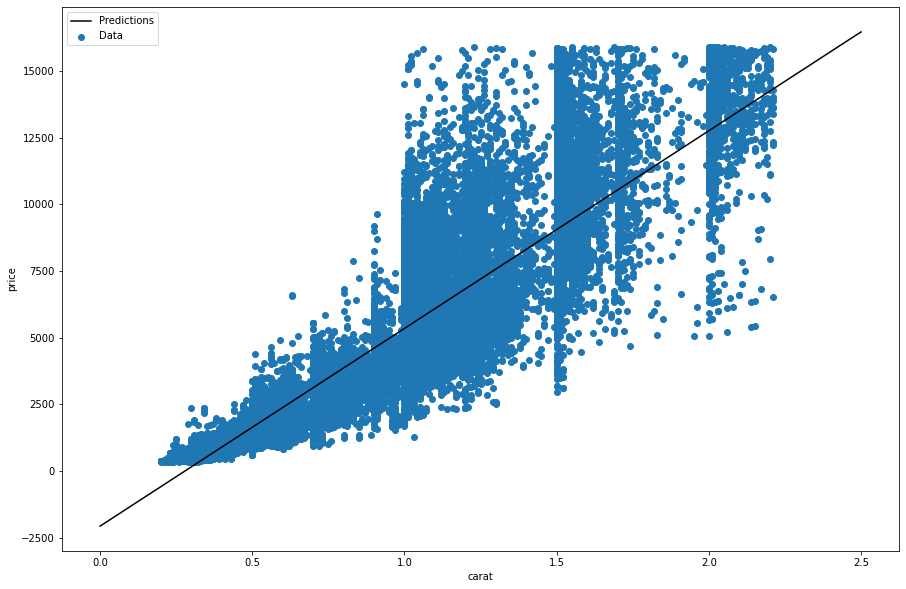

In [42]:
plot_carat(carats, prices)

mean absolute error is 885.47

In [43]:
prices = (b0 * data['carat']) + b1
error = prices - data['price']
error = np.abs(error)
error.mean()

885.4745102309122

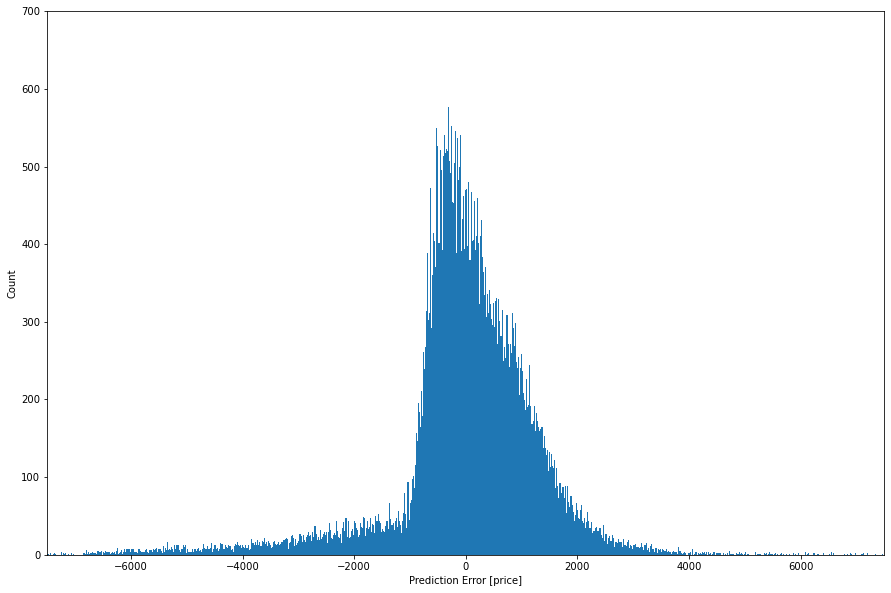

In [44]:
error = prices - data['price']
plt.figure(figsize=(15, 10))
plt.hist(error, bins=1000)
plt.xlabel('Prediction Error [price]')
xlim = [-7500, 7500]
ylim = [0, 700]
plt.xlim(xlim)
plt.ylim(ylim)
_ = plt.ylabel('Count')


## Conclusion

we made regression 